## Exercise: Discriminant Analysis and Unbalanced Datasets


In this exercise, we will use the handwritten digits data set of Scikit-learn (load_digits). Run the code below. Read the description of the data set and check a sample image. 


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


<Figure size 432x288 with 0 Axes>

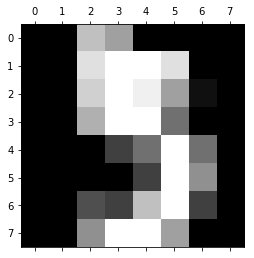

numpy.ndarray

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import numpy as np


DigitsData=load_digits()
print(DigitsData.keys()) 
#print(DigitsData.DESCR) #read description of the dataset
#print(DigitsData.data[1])

#plot one of the images in the data
plt.gray() 
plt.matshow(DigitsData.images[5]) 
plt.show() 



#### A) Our objective is to build classfiers that identify digit 9. For this purpose, answer the following (3pts):

1) Define the target value to be equal to 1 (or True) only for digit 9, and 0 (or False) otherwise.
You can define: y= (DigitsData.target == 9)


- Find how many times y is equal to 9 and how many times it is not equal to 9

You can use: print(sum(y==True)); print(sum(y==False))


COMMENT: what do you observe? Is the dataset for this classification problem balanced or not?

In [30]:
# write your code here
y= (DigitsData.target == 9)
print(sum(y==True))
print(sum(y==False))

#The dataset is not balanced as there are significantly more number of false target values as compared to true values.

180
1617


#### B) Find the accuracy of a dummy classifier (imported below) that always selects the majority class. Use the DigitsData.data as features and y (defined above) as the response. (3pts)

     - Use train_test_split with random_state= 0 for splitting the data
     - Select dummy classifier with "most frequent" strategy as follows: 
         - dummy_majority=DummyClassifier(strategy='most_frequent')


In [31]:
# write your code here
from sklearn.dummy import DummyClassifier
X=DigitsData.data
Y= (DigitsData.target == 9)
dummy_majority=DummyClassifier(strategy='most_frequent')
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0)
dummy_majority.fit(X_train, Y_train)
dummy_majority.score(X_test,Y_test)

0.8955555555555555

#### C) Instead of a dummy classifier, use an LDA classifer (with default threshold) to solve the above classification problem. Find accuracy, confusion matrix, precision, and recall. (5pts)

- Note: you may get a warning that features are correlated (collinear). However, we can still get the performance metrics as usual

In [42]:
X=DigitsData.data
Y=(DigitsData.target == 9)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0)
LDAmodelFitted= LinearDiscriminantAnalysis().fit(X_train, Y_train)
Target_predicted= LDAmodelFitted.predict(X_test)

print("The accuracy",LDAmodelFitted.score(X_test,Y_test))
print("The confusion Matrix is : ")
print(confusion_matrix(Y_test,Target_predicted))

print("Precision Score",precision_score(Y_test,Target_predicted))
print("Recall score",recall_score(Y_test,Target_predicted))

The accuracy 0.9644444444444444
The confusion Matrix is : 
[[394   9]
 [  7  40]]
Precision Score 0.8163265306122449
Recall score 0.851063829787234


C:\Users\Tigmanshu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


#### D) Use QDA classifer to perform the classification. Find accuracy, confusion matrix, precision, and recall. (5pts)
- Note: expect to see a warning that features are correlated (collinear). You can still get performance metrics.

In [43]:
# write your code here
X=DigitsData.data
Y=(DigitsData.target == 9)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0)
QDAmodelFitted= QuadraticDiscriminantAnalysis().fit(X_train, Y_train)
Target_predicted= QDAmodelFitted.predict(X_test)

print("The accuracy",QDAmodelFitted.score(X_test,Y_test))
print("The confusion Matrix is : ")
print(confusion_matrix(Y_test,Target_predicted))

print("Precision Score",precision_score(Y_test,Target_predicted))
print("Recall score",recall_score(Y_test,Target_predicted))

The accuracy 0.6622222222222223
The confusion Matrix is : 
[[252 151]
 [  1  46]]
Precision Score 0.233502538071066
Recall score 0.9787234042553191


C:\Users\Tigmanshu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


#### E) From the prediction of the QDA, plot the ROC curve. (4pts)

Text(0,0.5,'TruePositive')

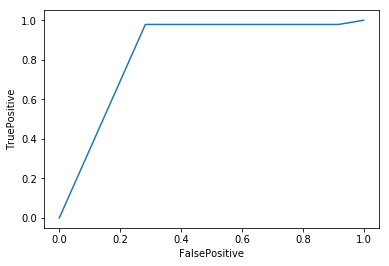

In [48]:
from sklearn.metrics import roc_curve
FalsePositive, TruePositive, thresholds = roc_curve(Y_test, QDAmodelFitted.predict_proba(X_test)[:, 1])
plt.plot(FalsePositive, TruePositive)
plt.xlabel('FalsePositive')
plt.ylabel('TruePositive')